# 🔵 **Parte 5.1 : Aprendizado por Regras** 🔵

Não é um algoritmo muito valorizado. Em geral, tem desempenho inferior às árvores de decisão. Também consegue trabalhar com atributos categóricos.

## OneR (One Rule)
> Testar coisas simples primeiro. Nem todo conjunto de dados exige algoritmos complexos.
*  Você só considera **um atributo** para criar as regras.

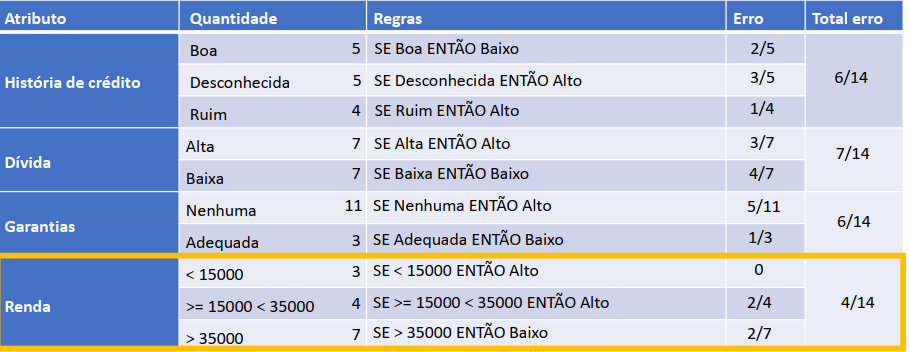

## PRISM
> Crio uma regra para cada possibilidade na variável dependente. Exemplo: uma regra par risco alto, outra para o moderado e outra para o risco baixo.
* Podemos utilizar mais de um atributo para criar a regra. Ex: Se X é a, Y é b e W é c então o risco é moderado.

In [2]:
# Como é um algoritmo "fora de moda", o sklearn não tem código para aprendizagem por regras.
# Por isso, vamos instalar outra biblioteca
!pip install Orange3

In [3]:
import Orange

# 🔴 Base risco de crédito (teste)

## Importando os dados
Perceba que não estamos importando com o pandas, mas sim com o Orange.

In [ ]:
base_risco_credito = Orange.data.Table('/content/4. risco_credito_regras.csv')

In [ ]:
base_risco_credito

[[ruim, alta, nenhuma, 0_15 | alto],
 [desconhecida, alta, nenhuma, 15_35 | alto],
 [desconhecida, baixa, nenhuma, 15_35 | moderado],
 [desconhecida, baixa, nenhuma, acima_35 | alto],
 [desconhecida, baixa, nenhuma, acima_35 | baixo],
 ...
]

No Orange, é necessário escrever c# na frente do nome a coluna da variável de interesse. Só assim ele entende que essa é a variável meta.

In [ ]:
base_risco_credito.domain #Name of columns

[historia, divida, garantias, renda | risco]

## Criando o algoritmo

In [ ]:
cn2 = Orange.classification.rules.CN2Learner()
regras_risco_credito = cn2(base_risco_credito)

In [ ]:
# Conhecendo as regras geradas:
for regras in regras_risco_credito.rule_list:
  print(regras)

IF renda==0_15 THEN risco=alto 
IF historia==boa AND divida!=alta THEN risco=baixo 
IF historia==boa AND garantias!=nenhuma THEN risco=baixo 
IF historia==boa AND renda!=15_35 THEN risco=baixo 
IF historia==boa THEN risco=moderado 
IF divida==alta THEN risco=alto 
IF historia!=desconhecida THEN risco=moderado 
IF garantias==adequada THEN risco=baixo 
IF renda==15_35 THEN risco=moderado 
IF historia==desconhecida THEN risco=baixo 
IF TRUE THEN risco=alto 


## Testando o modelo

a. história boa, dívida alta, garantias nenhuma, renda > 35

b. história ruim, dívida alta, garantias adequada, renda < 15


In [ ]:

previsoes = regras_risco_credito([['boa', 'alta', 'nenhuma', 'acima_35'], ['ruim', 'alta', 'adequada', '0_15']])
previsoes

array([1, 0])

In [ ]:
# O que esses números representam?
base_risco_credito.domain.class_var.values

('alto', 'baixo', 'moderado')

In [ ]:
for i in previsoes:
  #print(i)
  print(base_risco_credito.domain.class_var.values[i])

baixo
alto


# 🔴 Base credit data - 96.40%

## Importando dados

In [ ]:
base_credit = Orange.data.Table('/content/5. credit_data_regras.csv')

In [ ]:
base_credit.domain

[income, age, loan | default]

## Dividindo base de dados
Perceba que não estamos usando o TrainTesteSplit do Python

In [ ]:
base_dividida = Orange.evaluation.testing.sample(base_credit, n = 0.25) #25% dos dados serão utilizados para teste do modelo

In [ ]:
base_dividida
# Perceba que existem 2 matrizes. Uma de treino outra de teste

([[56050.3, 23.9738, 6870.84 | 1],
  [26617, 28.6165, 2727.24 | 0],
  [33867.5, 30.1579, 5714.03 | 1],
  [62908.4, 51.1468, 3213.9 | 0],
  [27153.7, 48.818, 3177.52 | 0],
  ...
 ],
 [[56201.8, 43.2775, 8346.32 | 0],
  [27954.7, 29.9045, 1627.04 | 0],
  [62988.8, 32.4746, 6924.9 | 0],
  [29732.1, 38.8767, 3485.02 | 0],
  [34237.6, 34.1017, 2658.09 | 0],
  ...
 ])

In [ ]:
base_teste = base_dividida[0]
base_treino = base_dividida[1]

In [ ]:
len(base_treino), len(base_teste)

(1500, 500)

## Criando modelo

In [ ]:
cn2 = Orange.classification.rules.CN2Learner()
regras_credit = cn2(base_treino)

In [ ]:
for regras in regras_credit.rule_list:
  print(regras)

IF age>=34.9257164876908 THEN default=0 
IF loan<=2507.64970973955 AND income>=20145.9885970689 THEN default=0 
IF income<=31702.3342987522 AND loan>=3665.88089899456 THEN default=1 
IF loan>=7660.34617051509 AND loan>=9601.375482171099 THEN default=1 
IF loan>=7660.34617051509 AND loan>=9595.28628892989 THEN default=0 
IF loan>=7660.34617051509 AND age>=21.4227129220963 THEN default=1 
IF income<=22925.8120805025 AND age>=34.7410444347188 THEN default=0 
IF income<=24857.6948815025 AND age>=26.382710393052502 THEN default=1 
IF loan<=5898.0008931423 AND income>=44324.286368209905 THEN default=0 
IF age>=34.851817262359 THEN default=0 
IF age>=34.5964918844402 THEN default=1 
IF age>=33.8957485635765 THEN default=0 
IF age>=33.6895613595843 THEN default=1 
IF age>=33.2456503002904 THEN default=0 
IF loan<=4859.2352866332 AND age>=32.6760442531668 THEN default=1 
IF age>=33.0920195085928 THEN default=1 
IF loan<=4859.2352866332 AND income>=34667.0204005204 THEN default=0 
IF income<=577

## Testando modelo

In [ ]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_treino,
                                                     base_teste,
                                                      [lambda testdata: regras_credit])

In [ ]:
previsoes

In [ ]:
Orange.evaluation.CA(previsoes) # CA stands for Classification Accuracy

array([0.964])

# 🔴 Base census - 78.90% (executado na interface gráfica do Orange)

# 🔵 **Parte 5.2: Classificador base - Majority learner** 🔵

Não é um algoritmo. É um classificador baseado na maioria dos dados.

Por exemplo: se a maioria dos clientes paga o empréstimo, classifico um novo cliente como pagador.

# 🔴 Base credit data - 85.85%

Obs: codando com orange

In [4]:
base_credit = Orange.data.Table('5. credit_data_regras.csv')

In [5]:
base_credit.domain

[income, age, loan | default]

### Criando o Classificador Base

In [6]:
majority = Orange.classification.MajorityLearner()

In [7]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_credit, base_credit, [majority])

In [8]:
Orange.evaluation.CA(previsoes)

array([0.8585])

In [9]:
for registro in base_credit:
  print(registro.get_class())

0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
1
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
1
1
0
0
0
1
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
1
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
0
1
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
1
1
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0


In [ ]:
from collections import Counter
Counter(str(registro.get_class()) for registro in base_credit)

# Contando quantos valores 0 temos, quantos valores 1 temos.

Counter({'0': 1717, '1': 283})

A maior parte das classificações é 0. Todos os novos registros receberão 0.

In [ ]:
1717 / 2000

0.8585

**Qualquer modelo (algoritmo) que gera um accuracy score inferior a 85,85% não deve ser usado. Seria mais interessante utiliar o classificador base.**


# 🔴 Base census - 75.91%

In [10]:
base_census = Orange.data.Table('6. census_regras.csv')

In [11]:
base_census.domain

[age, workclass, final-weight, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loos, hour-per-week, native-country | income]

### Criando modelo no Orange

In [13]:
majority = Orange.classification.MajorityLearner()
previsoes = Orange.evaluation.testing.TestOnTestData(base_census, base_census, [majority])

In [14]:
Orange.evaluation.CA(previsoes)

array([0.75919044])

#### Fazendo contagem manual.
(Outra forma de chegar no mesmo lugar)

In [ ]:
Counter(str(registro.get_class()) for registro in base_census)

Counter({'<=50K': 24720, '>50K': 7841})

In [ ]:
24720 / (24720 + 7841)
# Renda menor ou igual que 50K é representativa de 76% dos dados. Maioria dos dados.

0.7591904425539756